In [1]:
# =================================
# import packages
# =================================
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import pickle

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

In [2]:
# =================================
# Add the parent directory to the Python path to import ML_toolbox
# =================================
def get_parent_dir():
    try:
        # Works when running a script
        current_dir = os.path.dirname(__file__)
    except NameError:
        # Works in notebooks / REPL
        current_dir = os.getcwd()
    return os.path.abspath(os.path.join(current_dir, '..'))

parent_dir = get_parent_dir()
sys.path.append(parent_dir)

from ML_toolbox.d_ANN import MyANN

In [3]:
# ====================================================================
# plotting parameters
# ====================================================================
fig_width = 8
fig_height = 6
marker_size = 10

In [4]:
# ====================================================================
# model training parameters
# ====================================================================
my_learning_rate = 0.5
my_num_of_iterations = 4000

In [5]:
# ====================================================================
# Other settings
# ====================================================================
np.random.seed(1)

In [6]:
# load the iris data: use the setosa and versicolor for binary classification
data_in = load_iris()
X = data_in.data[0:100, 2:4]
y = data_in.target[0:100]

# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

# standardize the training data
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)

# use the mean and standard deviation computed from the training data to standardize the testing data
X_test_scaled = standard_scaler.transform(X_test)

# information
my_num_of_variables = X_train_scaled.shape[1]
my_num_of_outputs = 1
my_num_of_hidden_units = 2

my_initial_theta = {}
my_initial_theta['layer_1'] = np.random.random((2, 3))
my_initial_theta['layer_2'] = np.random.random((1, 3))

In [7]:
# model training
my_ann_obj = MyANN(num_of_variables=my_num_of_variables,
                   num_of_hidden_units=my_num_of_hidden_units,
                   num_of_outputs=my_num_of_outputs,
                   bool_is_classification=True,
                   initial_theta=my_initial_theta,
                   num_of_iterations=my_num_of_iterations,
                   learning_rate=my_learning_rate)
theta_at_all_iterations, cost_list = my_ann_obj.fit(X_train, y_train)

print('Optimal theta:')
print(theta_at_all_iterations[-1])

iteration = 1000
iteration = 2000
iteration = 3000
Optimal theta:
{'layer_2': array([[-6.52180227, 12.29698206,  0.72009352]]), 'layer_1': array([[-7.06913151,  1.78742469,  3.43303683],
       [-1.00680362,  0.41261162,  0.673237  ]])}


In [8]:
# arrange theta into an array for easy plotting
theta_in_array = {}
theta_in_array['layer_1'] = np.zeros((my_num_of_hidden_units, (my_num_of_variables + 1), len(theta_at_all_iterations)))
theta_in_array['layer_2'] = np.zeros((my_num_of_outputs, (my_num_of_hidden_units + 1), len(theta_at_all_iterations)))

for i in range(len(theta_at_all_iterations)):
    for j in range(my_num_of_hidden_units):
        for k in range(my_num_of_variables + 1):
            theta_in_array['layer_1'][j, k, i] = theta_at_all_iterations[i]['layer_1'][j, k]

for i in range(len(theta_at_all_iterations)):
    for j in range(my_num_of_outputs):
        for k in range(my_num_of_hidden_units + 1):
            theta_in_array['layer_2'][j, k, i] = theta_at_all_iterations[i]['layer_2'][j, k]

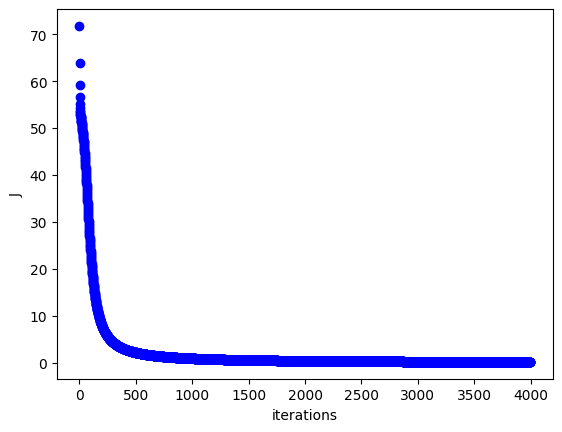

In [9]:
# plot cost vs iterations
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('iterations')
# ax.set_ylabel(r'$J(\theta)$')
ax.set_ylabel('J')
ax.scatter(range(len(cost_list)), cost_list, color='blue')

In [10]:
# test the model using X_test and y_test
y_predicted_by_me = my_ann_obj.predict(X_test)

my_accuracy_score = accuracy_score(y_test, y_predicted_by_me)
print('Labels predicted by me:', y_predicted_by_me)
print('True labels:', y_test)
print('My accuracy:', my_accuracy_score)

proba_predicted_by_me = my_ann_obj.predict_proba(X_test)
print('My predicted probability:', np.round(proba_predicted_by_me, 2))

Labels predicted by me: [1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0]
True labels: [1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0]
My accuracy: 1.0
My predicted probability: [1.   1.   0.   1.   0.99 0.   0.   1.   1.   1.   1.   0.   1.   1.
 1.   0.   0.   0.01 1.   0.  ]


In [11]:
# ===================================
# run sklearn
# ===================================
MLP_classifier_obj = MLPClassifier(solver='lbfgs', activation='logistic', alpha=1e-15, random_state=1,
                               hidden_layer_sizes=(2))
MLP_classifier_obj.fit(X_train, np.ravel(y_train))

probs_predicted_by_mlp = MLP_classifier_obj.predict_proba(X_test)
y_predicted_by_mlp = MLP_classifier_obj.predict(X_test)
MLP_accuracy = accuracy_score(y_test, y_predicted_by_mlp)
print('Labels predicted by MLP:', y_predicted_by_mlp)
print('True labels:', y_test)
print('MLP accuracy:', MLP_accuracy)
print('Probability predicted by MLP:', np.round(probs_predicted_by_mlp[:, 1], 2))

Labels predicted by MLP: [1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0]
True labels: [1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0]
MLP accuracy: 1.0
Probability predicted by MLP: [1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.]
